## Projet de segmentation clients

   ### Objectif : Utiliser l'analyse de données et le machine learning pour cibler des clients, pour savoir quel esl le type du client et quelle produit lui recommander.


###    Etape à suivre : 
### 1) Analyse et exploration du jeu de données.
### 2) Preprocessing du jeu de données.
### 3) Modelisation.   

## Chargement des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

### 1) Analyse et exploration du jeu de données

In [2]:
data = pd.read_csv('client.csv', delimiter='\t')

In [3]:
df = data.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
## Dimension de mon jeu de données
df.shape

(2240, 29)

Le jeu de données se compose de 2240 lignes et 29 variables.

In [5]:
### Liste de colonnes
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

<ul>
<li>ID : Identifiant unique du client</li>
<li>Year_Birth : année de naissance du client</li>
<li>Éducation : niveau d'éducation du client</li>
<li>Marital_Status : état civil du client</li>
<li>Income : Revenu annuel du ménage du client</li>
<li>Kidhome : nombre d'enfants dans le ménage du client</li>
<li>Teenhome : Nombre d'adolescents dans le ménage du client</li>
<li>Dt_Customer : Date d'inscription du client auprès de l'entreprise</li>
<li>Récency : nombre de jours depuis le dernier achat du client</li>
<li>Plainte : 1 si le client s'est plaint au cours des 2 dernières années, 0 sinon</li>


<li>MntWines : Montant dépensé pour le vin au cours des 2 dernières années</li>
<li>MntFruits : Montant dépensé en fruits au cours des 2 dernières années</li>
<li>MntMeatProducts : montant dépensé pour la viande au cours des 2 dernières années</li>
<li>MntFishProducts : montant dépensé pour le poisson au cours des 2 dernières années</li>
<li>MntSweetProducts : montant dépensé en sucreries au cours des 2 dernières années</li>
<li>MntGoldProds : Montant dépensé en or au cours des 2 dernières années</li>


<li>NumDealsPurchases : nombre d'achats effectués avec une remise</li>
<li>AcceptedCmp1 : 1 si le client a accepté l'offre lors de la 1ère campagne, 0 sinon</li>
<li>AcceptedCmp2 : 1 si le client a accepté l'offre lors de la 2ème campagne, 0 sinon</li>
<li>AcceptedCmp3 : 1 si le client a accepté l'offre dans la 3ème campagne, 0 sinon</li>
<li>AcceptedCmp4 : 1 si le client a accepté l'offre lors de la 4ème campagne, 0 sinon</li>
<li>AcceptedCmp5 : 1 si le client a accepté l'offre lors de la 5ème campagne, 0 sinon</li>
<li>Réponse : 1 si le client a accepté l'offre lors de la dernière campagne, 0 sinon</li>
    
<li>NumWebPurchases : nombre d'achats effectués sur le site Web de l'entreprise</li>
<li>NumCatalogPurchases : Nombre d'achats effectués à l'aide d'un catalogue</li>
<li>NumStorePurchases : Nombre d'achats effectués directement en magasin</li>
<li>NumWebVisitsMonth : nombre de visites sur le site Web de l'entreprise au cours du dernier mois</li>   
</ul>    

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Preprocessing 1

In [7]:
### Identification des valeurs manquantes
(df.isna().sum()/df.shape[0])*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Nous observons seulement 1.07% de valeurs manquantes au niveau de la variable Income, ce qui n'est pas significative. Nous décidons donc de supprimer les lignes qui présentent des valeurs manquantes.

In [8]:
### Suppression des valeurs manquantes
df.dropna(axis=0, inplace=True)
(df.isna().sum()/df.shape[0])*100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

In [9]:
### Identification de doublons
df.duplicated().sum()

0

Notre dataset n'admet pas de doublons.

La variable Year_Birth est composé des années de naissances de nos clients, créons une autre colonne qui va contenir les différents ages de nos clients.

In [10]:
## Fonction pour calculer l'age de nos différents clients
def annees_ages(valeur):
    dateCourant = datetime.now()
    date=dateCourant.date()
    annee = date.strftime("%Y")
    age = int(annee) - valeur
    return age

In [11]:
df['Ages'] = df['Year_Birth'].map(annees_ages)
df['Ages'].head()

0    64
1    67
2    56
3    37
4    40
Name: Ages, dtype: int64

La variable Dt_Customer correspond à la date d'inscription du client auprès de l'entreprise, créons à partir de cette variable L'ancienneté en jours de nos clients - L'ancienneté est calculée en soustrayant la date actuelle à la date de création du client.

In [12]:
### Les valeurs de la variable sont convertis en date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].head()

0   2012-04-09
1   2014-08-03
2   2013-08-21
3   2014-10-02
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [13]:
def dates_jours(valeur):
    dateCourant = datetime.now()
    date=dateCourant.date()
    annee = date.strftime("%Y-%m-%d")
    
    dr = datetime.strptime(annee, "%Y-%m-%d")-valeur
    return dr.days

In [14]:
df['Anciennete_jrs'] = df['Dt_Customer'].map(dates_jours)

In [15]:
df[['Dt_Customer','Anciennete_jrs']].head(10)

,Dt_Customer,Anciennete_jrs
0,2012-04-09,3474
1,2014-08-03,2628
2,2013-08-21,2975
3,2014-10-02,2568
4,2014-01-19,2824
5,2013-09-09,2956
6,2012-11-13,3256
7,2013-08-05,2991
8,2013-06-06,3051
9,2014-03-13,2771


In [16]:
# def split_string(valeur):
#     liste_split = valeur.split()
#     return int(liste_split[0])
    

In [17]:
# df['Anciennete_jrs'] = df['Anciennete'].map(split_string)

In [18]:
# df[['Dt_Customer','Anciennete','Anciennete_jrs']].head(10)

Supprimons les colonnes ID, Year_Birth, Dt_Customer qui me semblent plus nécessaire pour la suite ainsi que les colonnes Z_CostContact, Z_Revenue qui ne contiennent pas des données utiles.

In [19]:
### Suppressions des colonnes ID, Year_Birth, Z_CostContact, Z_Revenue
df = df.drop(columns=['ID','Year_Birth','Dt_Customer','Z_CostContact','Z_Revenue'], axis=1)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages,Anciennete_jrs
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,64,3474
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,67,2628
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,56,2975
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,37,2568
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,40,2824


In [20]:
df.shape

(2216, 26)

Nous nous retrouvons avec un jeu de données composé de 2216 lignes et 26 colonnes.

In [21]:
### Description des variables quantitatives
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages,Anciennete_jrs
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,52.179603,3015.006318
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,232.469034
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,2503.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,2843.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,3016.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,3189.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,128.000000,3566.000000


In [22]:
### Modalités des variables qualitatives
for col in df.select_dtypes('object'):
    print(f'{col :-<50}{ df[col].unique()}')

Education-----------------------------------------['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status------------------------------------['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


### visualisation des données

In [23]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Ages', 'Anciennete_jrs'],
      dtype='object')

In [24]:
## Variables quantitatives continues
var_quant_cont = ['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 
                  'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Ages', 'Anciennete_jrs']

In [25]:
## Variables quantitatives discrètes
var_quant_disc = df.select_dtypes(exclude='object').drop(var_quant_cont, axis=1).columns
var_quant_disc

Index(['Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [26]:
var_quant_cont

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Ages',
 'Anciennete_jrs']

In [27]:
df[var_quant_cont].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Ages,Anciennete_jrs
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,52.179603,3015.006318
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,11.985554,232.469034
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,2503.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,44.000000,2843.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,51.000000,3016.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,62.000000,3189.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,128.000000,3566.000000


### Variables qualitatives

In [28]:
# for col in df.select_dtypes('object'):
#     plt.figure(figsize=(8,8))
#     df[col].value_counts().plot.pie(autopct='%1.1f%%')
#     plt.legend()
#     #plt.title(' ' + col)
#     plt.show()

In [29]:
def graphBar(variable, couleur, titre):
    ax = df[variable].value_counts().plot(kind='bar', figsize=(18,5),
                                            color=couleur, fontsize=13,);
    ax.set_alpha(0.8)
    ax.set_title(titre, fontsize=18)
    ax.set_ylabel("Nombre d'individus", fontsize=18);
    
    
    # créer une liste pour collecter les données plt.patches
    totals = []

    # trouver les valeurs et ajouter à la liste
    for i in ax.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # définir des étiquettes de barres individuelles à l'aide de la liste ci-dessus
    for i in ax.patches:
        # get_x tire vers la gauche ou vers la droite ; get_height pousse vers le haut ou vers le bas
        ax.text(i.get_x(), i.get_height()+.5, \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                    color='dimgrey')

def pieBar(variable, couleur, titre):
    fig, ax = plt.subplots(1, 2)
    graphBar(variable, couleur, titre)
    ax[0].pie(df[variable].value_counts(),
    #                labels=['absence', 'presence'],
                   colors = couleur,
    #                explode = [0, 0.05],
               autopct = '%1.2f%%',
               shadow = True)
    ax[0].set_title(titre, fontsize=18)
#     plt.savefig(f'img/{titre}.png')
    plt.show()
    print(120*'=')
from random import sample

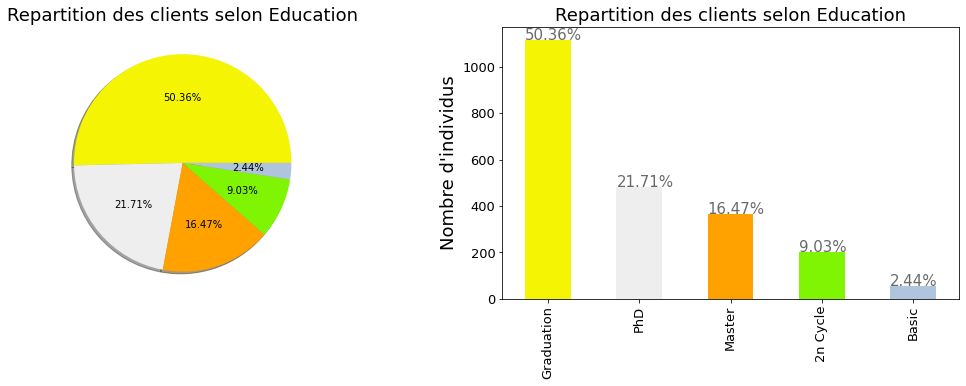

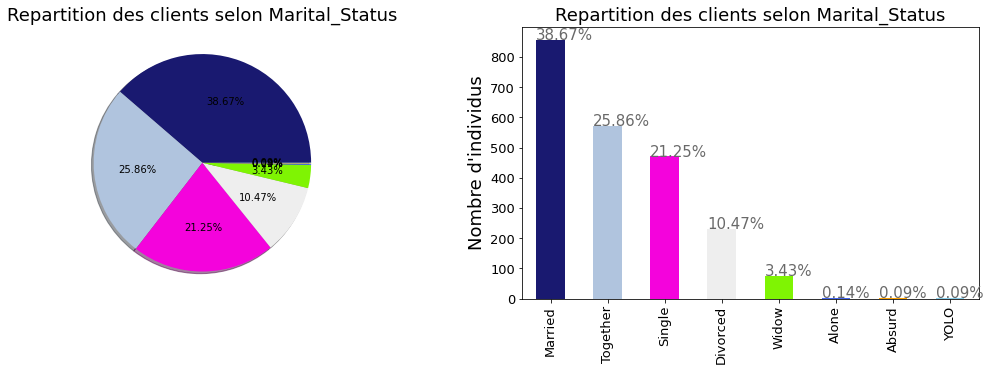

In [30]:
couleurs = ['SkyBlue', '#4568f1', '#f4f403', '#EEEEEE', '#7ff403', '#f403dc', '#ffa200', 'MidnightBlue','LightSteelBlue']

for col in df.select_dtypes('object'):
    k = len(df[col].unique())
    pieBar(variable=col, couleur=sample(couleurs, k=k), titre='Repartition des clients selon {}'.format(col))


### Variables quantitatives discrètes

In [31]:
def graphBar(variable, couleur, titre):
    fig, ax = plt.subplots(figsize=(20, 8), nrows=1, ncols=1)
    ax = df[variable].value_counts().plot(kind='bar', figsize=(18,5),
                                            color=couleur, fontsize=13,);
    ax.set_alpha(0.8)
    ax.set_title(titre, fontsize=18)
    ax.set_ylabel("Nombre d'individus", fontsize=18);
    
    
    # créer une liste pour collecter les données plt.patches
    totals = []

    # trouver les valeurs et ajouter à la liste
    for i in ax.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # définir des étiquettes de barres individuelles à l'aide de la liste ci-dessus
    for i in ax.patches:
        # get_x tire vers la gauche ou vers la droite ; get_height pousse vers le haut ou vers le bas
        ax.text(i.get_x(), i.get_height()+.5, \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                    color='dimgrey')
from random import sample        

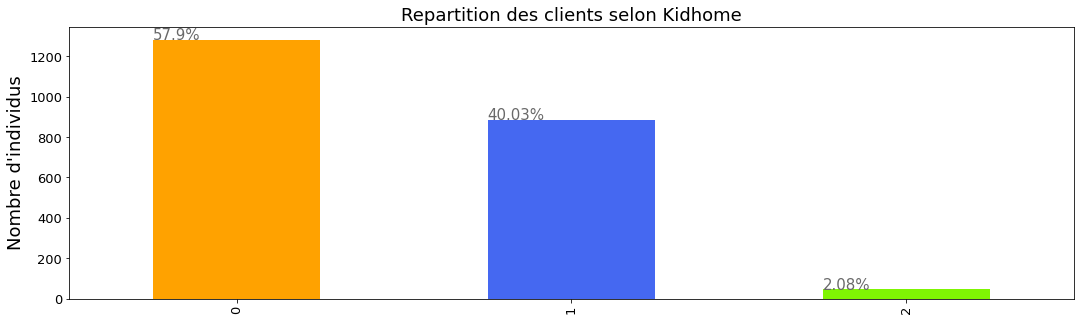

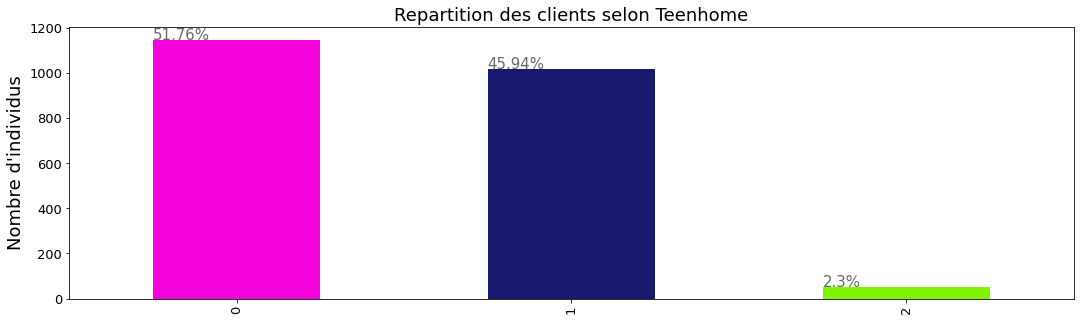

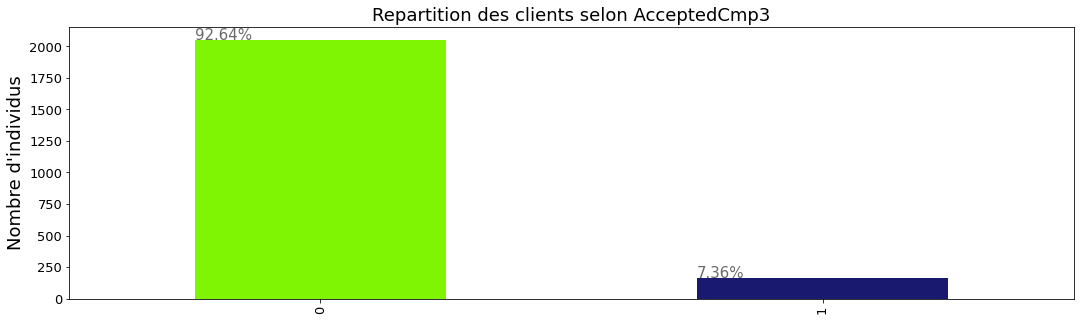

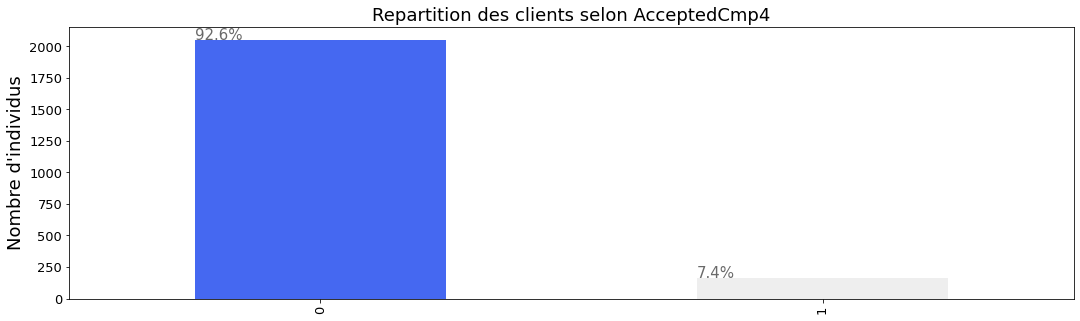

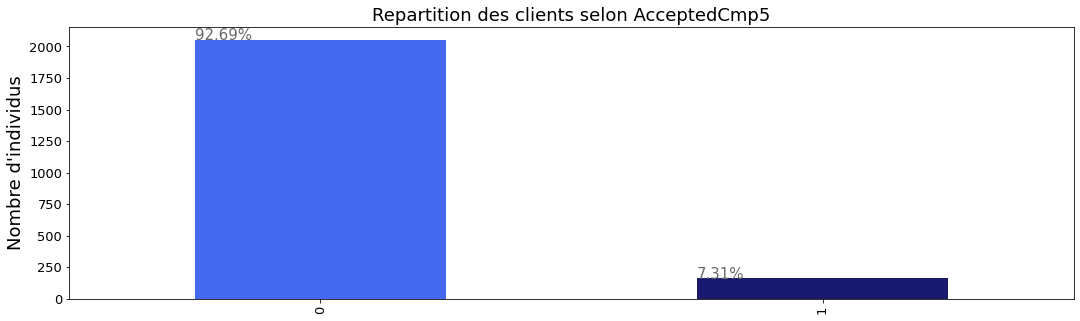

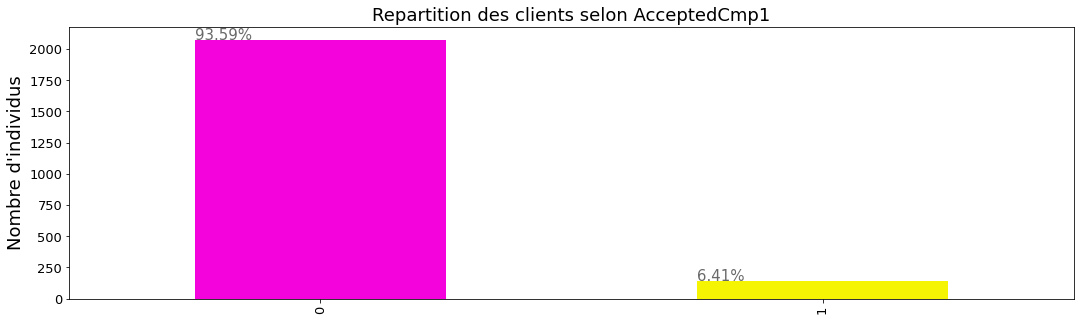

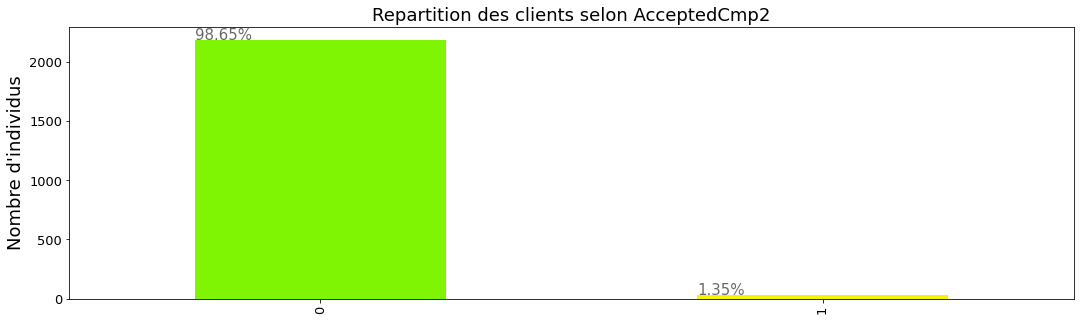

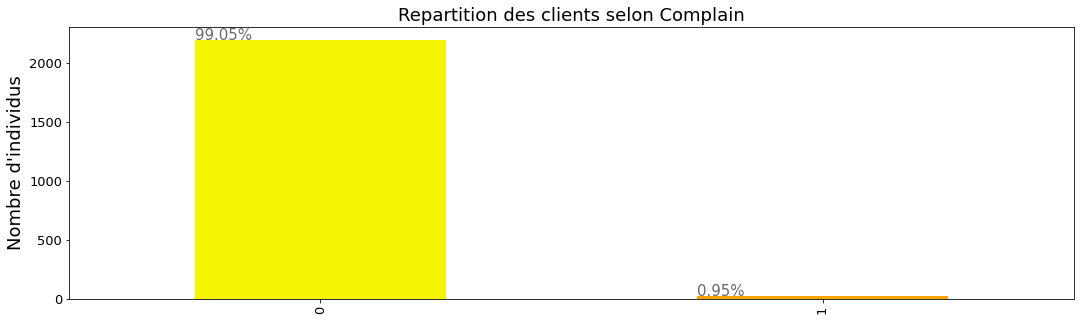

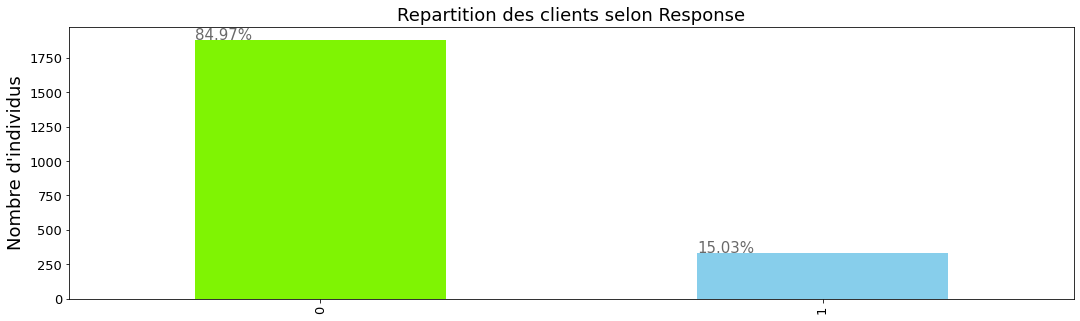

In [32]:
couleurs = ['SkyBlue', '#4568f1', '#f4f403', '#EEEEEE', '#7ff403', '#f403dc', '#ffa200', 'MidnightBlue','LightSteelBlue']

for col in var_quant_disc:
    k = len(df[col].value_counts())
    graphBar(variable=col, couleur=sample(couleurs, k=k), titre='Repartition des clients selon {}'.format(col))


### Variables quantitatives continues

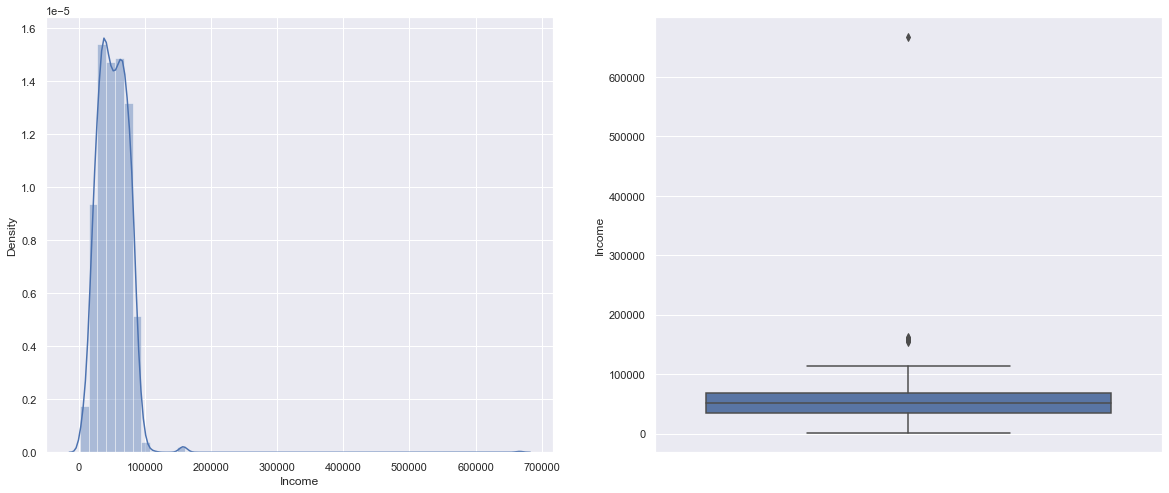

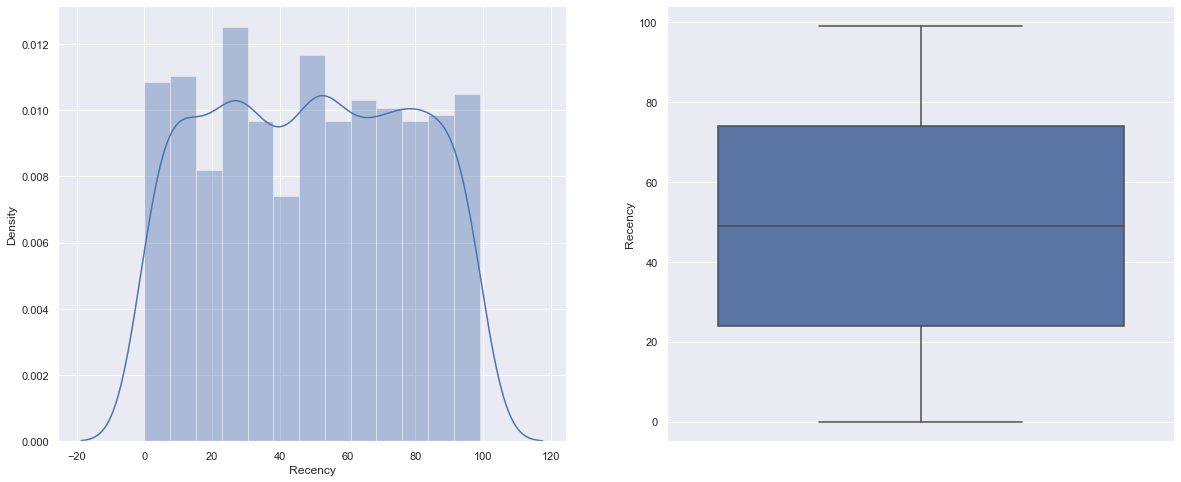

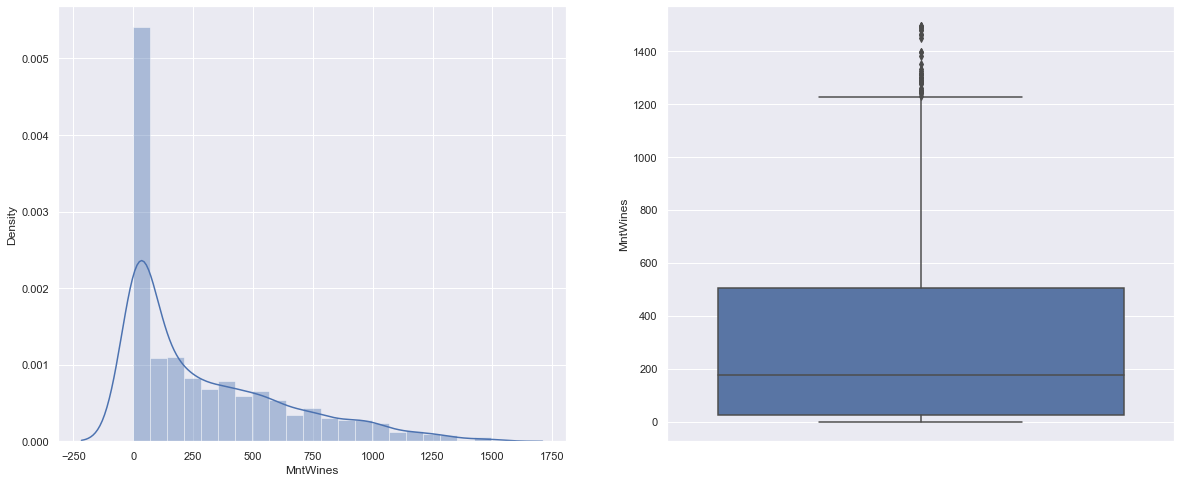

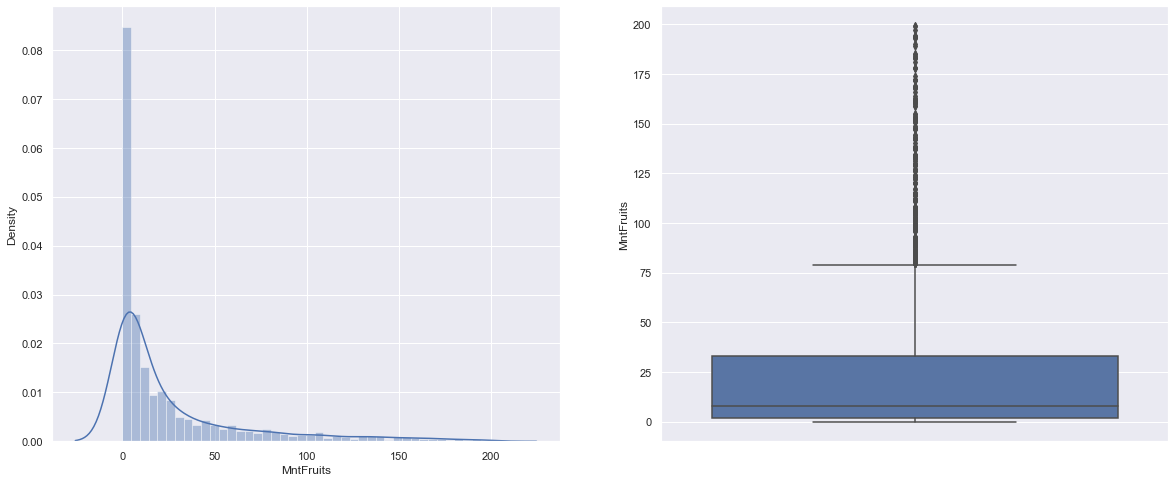

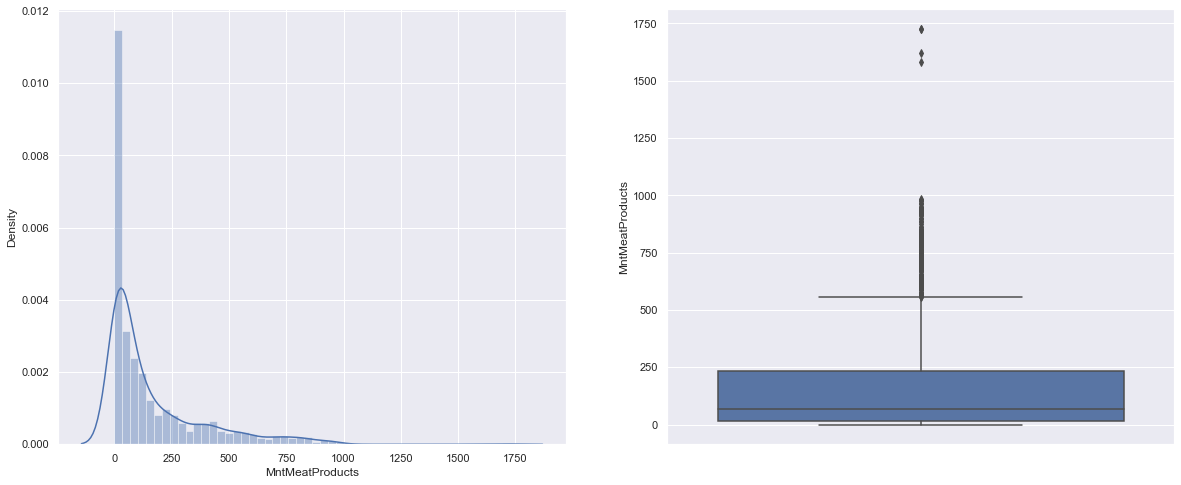

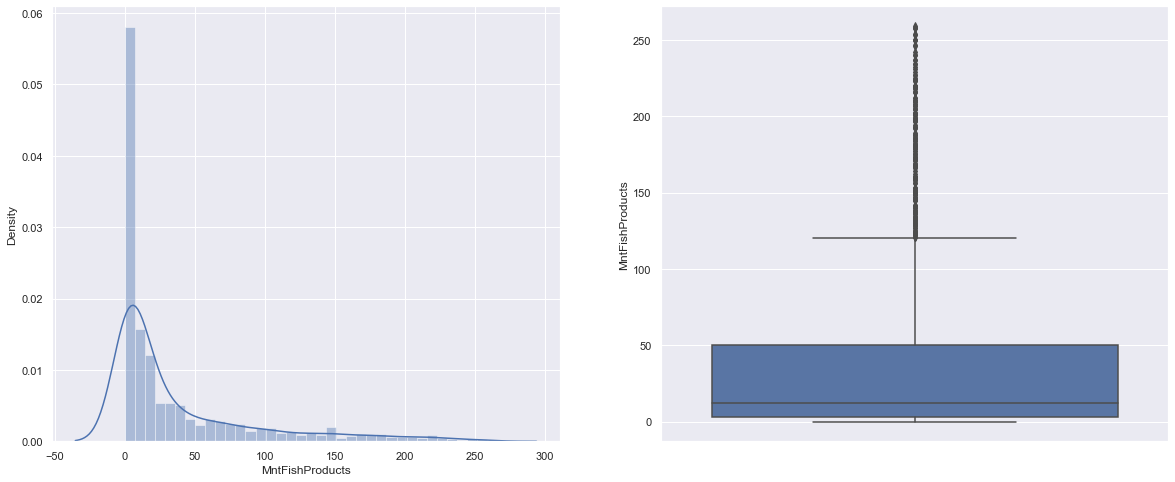

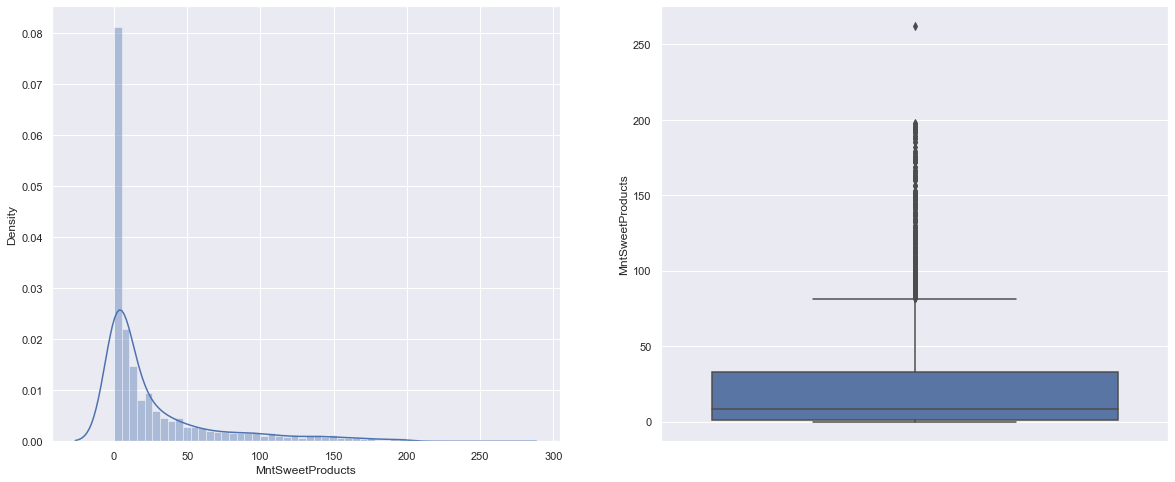

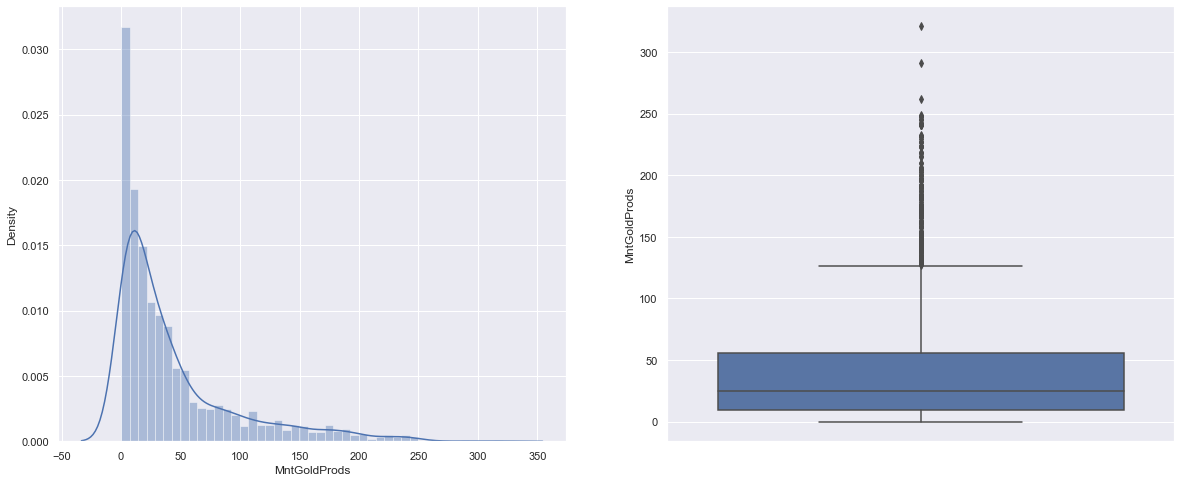

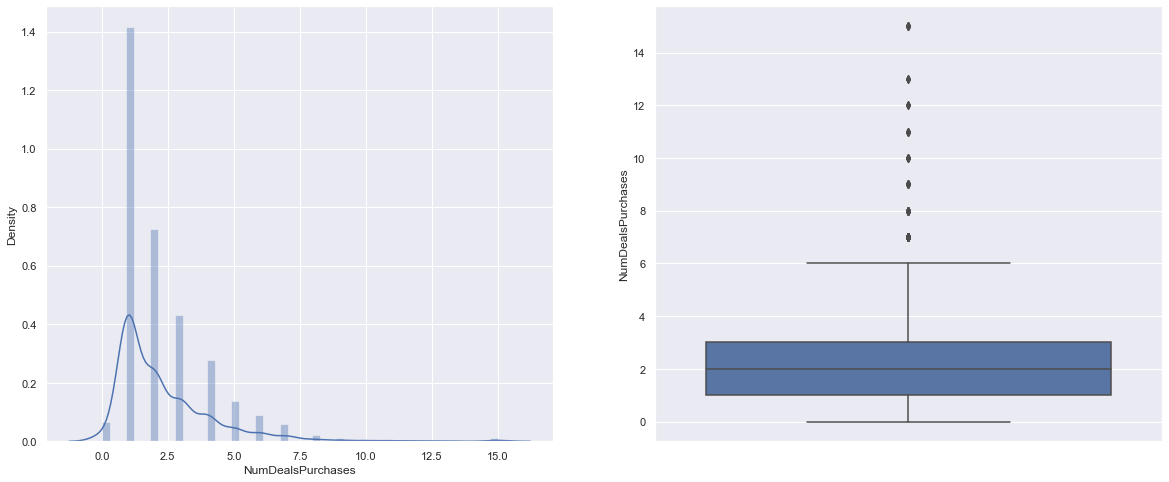

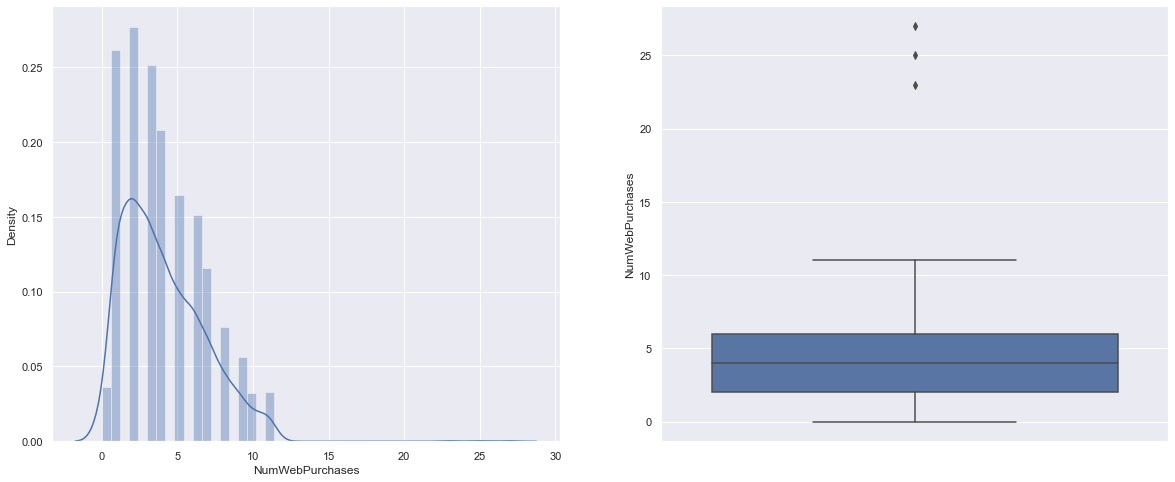

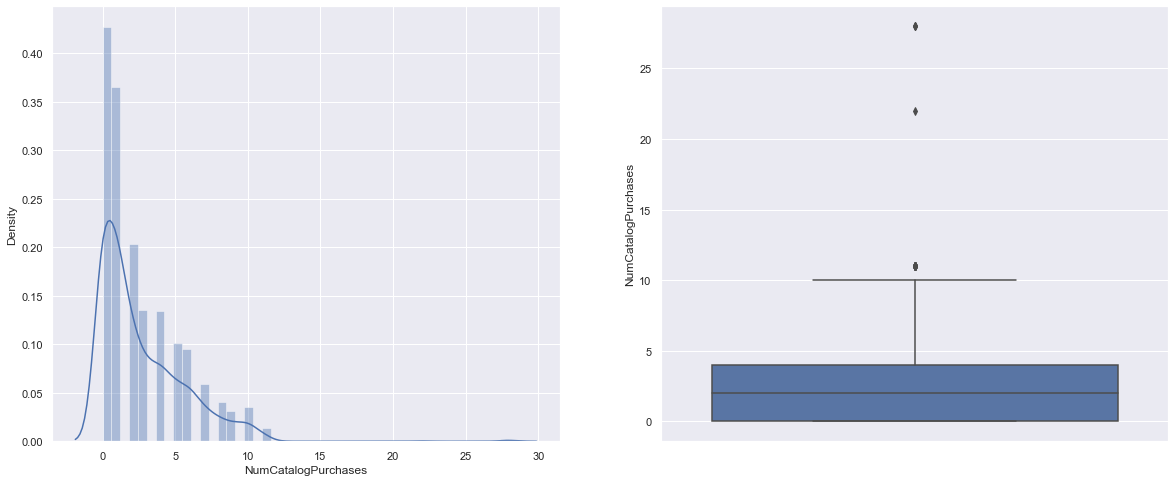

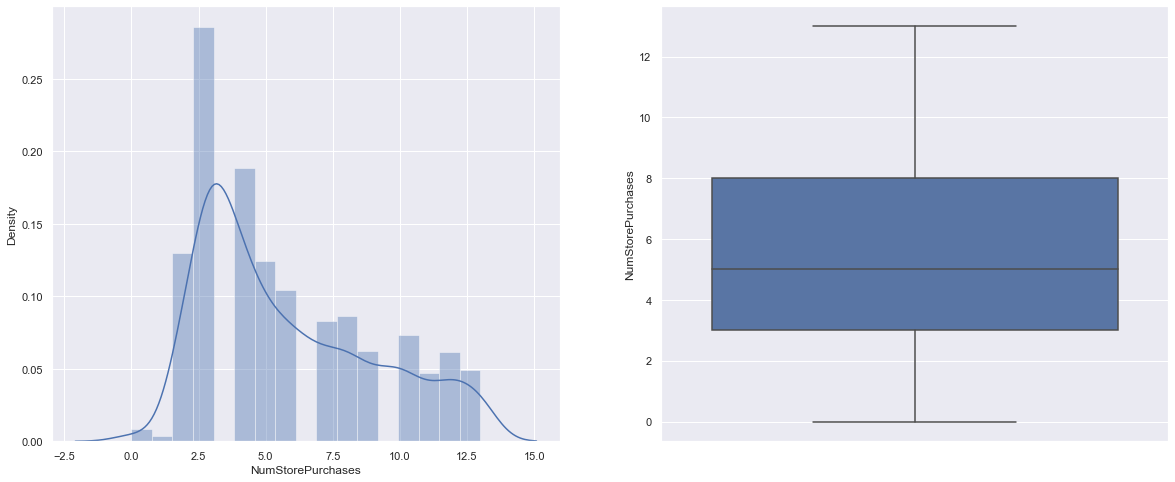

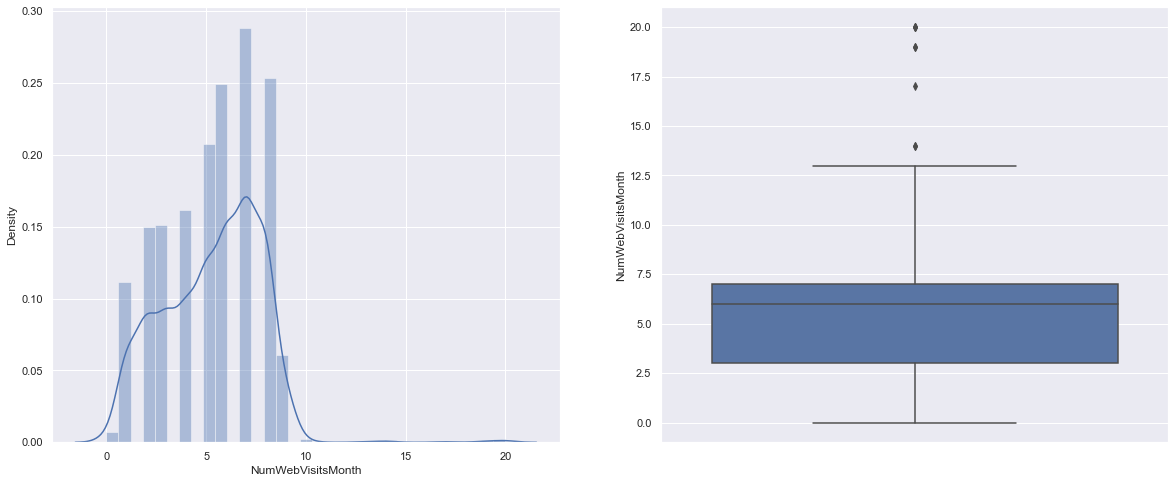

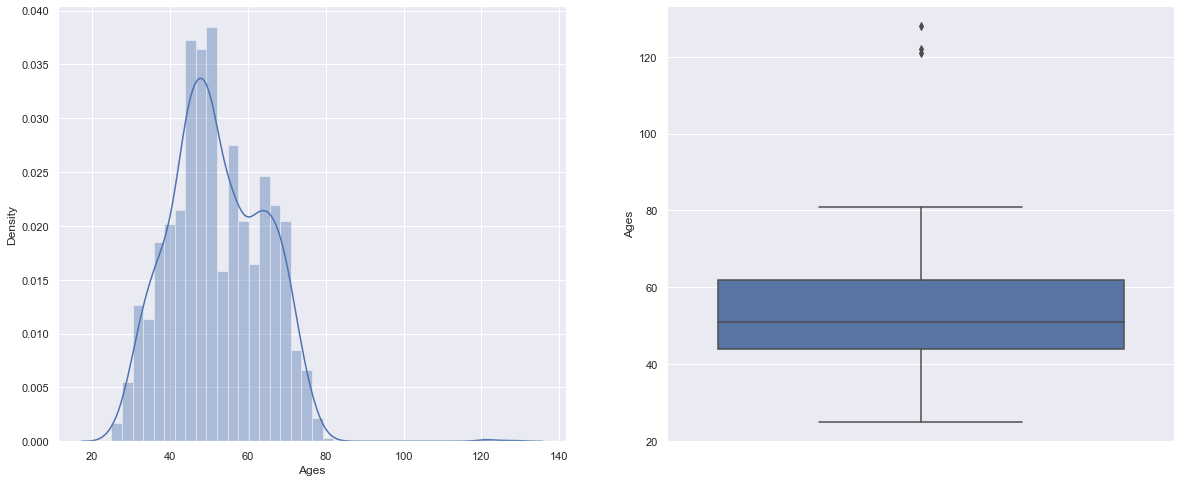

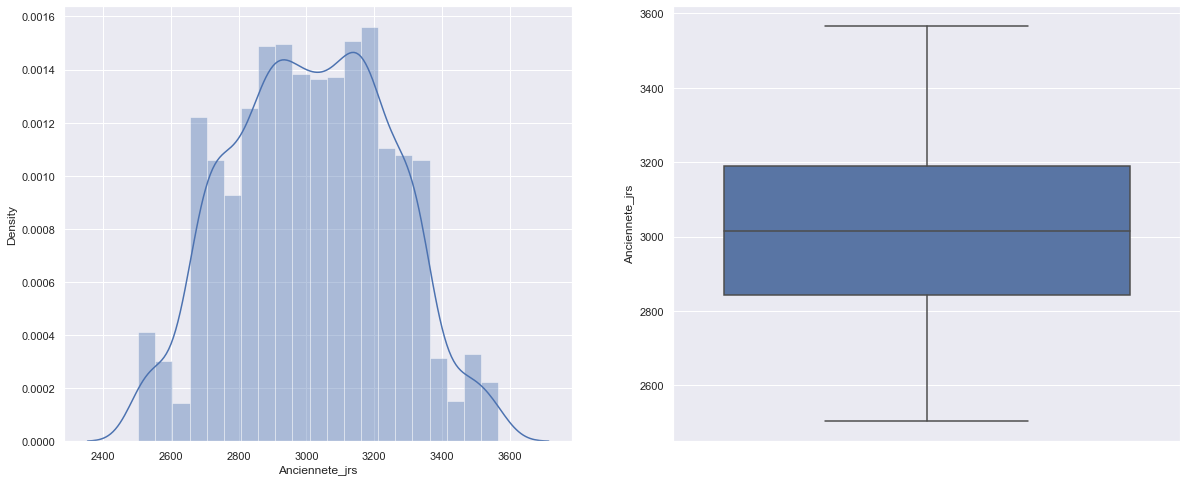

In [33]:
for col in var_quant_cont:
    sns.set(style='darkgrid')
    fig, ax = plt.subplots(figsize=(20, 8), nrows=1, ncols=2)
    
    
    #print(f'{col :-<50}')
    sns.distplot(df[col], ax=ax[0])
    
    #df[col].plot.hist(ax=ax[0])
    sns.boxplot(y=df[col], ax=ax[1])
    plt.show()

### Preprocessing 2

### Encodage

In [34]:
# ### Modalités des variables qualitatives
# for col in df.select_dtypes('object').drop('Dt_Customer', axis=1):
#     print(f'{col :-<50}{ df[col].unique()}')

In [35]:
encoder_quali=OneHotEncoder(sparse=False, drop='if_binary')

In [36]:
df_quali = df.select_dtypes('object')
df_quali

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [37]:
df_quali_enc=pd.DataFrame(encoder_quali.fit_transform(df_quali), index=df_quali.index)
df_quali_enc

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
df_quali_enc.columns = encoder_quali.get_feature_names(df.select_dtypes('object').columns)
df_quali_enc

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Normalisation

Normalisons les variables quantitatives pour qu'elles est la meme moyenne et la meme variance.  

In [39]:
scaler = RobustScaler()

In [40]:
df_quanti = df[var_quant_cont]
df_quanti.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Ages,Anciennete_jrs
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,64,3474
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,67,2628
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,56,2975
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,37,2568
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,40,2824


In [41]:
df_quanti_norm=scaler.fit_transform(df_quanti)
df_quanti_norm = pd.DataFrame(df_quanti_norm, index=df_quanti.index, columns=df_quanti.columns)

In [42]:
df_quanti_norm

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Ages,Anciennete_jrs
0,0.203393,0.18,0.957380,2.580645,2.210405,3.404255,2.50000,1.351064,0.5,1.00,2.00,-0.2,0.25,0.722222,1.323699
1,-0.151645,-0.22,-0.339917,-0.225806,-0.286705,-0.212766,-0.21875,-0.393617,0.0,-0.75,-0.25,-0.6,-0.25,0.888889,-1.121387
2,0.609034,-0.46,0.522869,1.322581,0.272832,2.106383,0.40625,0.372340,-0.5,1.00,0.00,1.0,-0.50,0.277778,-0.118497
3,-0.744619,-0.46,-0.339917,-0.129032,-0.221965,-0.042553,-0.15625,-0.414894,0.0,-0.50,-0.50,-0.2,0.00,-0.777778,-1.294798
4,0.208059,0.90,-0.003119,1.129032,0.231214,0.723404,0.59375,-0.202128,1.5,0.25,0.25,0.2,-0.25,-0.611111,-0.554913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.296261,-0.06,1.111227,1.129032,0.527168,0.638298,3.43750,4.734043,0.0,1.25,0.25,-0.2,-0.25,0.166667,0.080925
2236,0.380279,0.14,0.481289,-0.258065,-0.175723,-0.255319,-0.25000,-0.351064,2.5,1.00,0.00,0.0,0.25,1.333333,-1.306358
2237,0.168563,0.84,1.524948,1.290323,0.689017,0.425532,0.12500,-0.010638,-0.5,-0.50,0.25,1.6,0.00,-0.611111,-0.572254
2238,0.537749,-0.82,0.527027,0.709677,0.675145,1.446809,0.68750,0.776596,0.0,0.50,0.75,1.0,-0.75,0.777778,-0.569364


### MODELISATION

In [43]:
df_clt = pd.concat([df_quanti_norm, df_quali_enc], axis=1)

In [44]:
df_clt

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.203393,0.18,0.957380,2.580645,2.210405,3.404255,2.50000,1.351064,0.5,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.151645,-0.22,-0.339917,-0.225806,-0.286705,-0.212766,-0.21875,-0.393617,0.0,-0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.609034,-0.46,0.522869,1.322581,0.272832,2.106383,0.40625,0.372340,-0.5,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.744619,-0.46,-0.339917,-0.129032,-0.221965,-0.042553,-0.15625,-0.414894,0.0,-0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.208059,0.90,-0.003119,1.129032,0.231214,0.723404,0.59375,-0.202128,1.5,0.25,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.296261,-0.06,1.111227,1.129032,0.527168,0.638298,3.43750,4.734043,0.0,1.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,0.380279,0.14,0.481289,-0.258065,-0.175723,-0.255319,-0.25000,-0.351064,2.5,1.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,0.168563,0.84,1.524948,1.290323,0.689017,0.425532,0.12500,-0.010638,-0.5,-0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,0.537749,-0.82,0.527027,0.709677,0.675145,1.446809,0.68750,0.776596,0.0,0.50,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Détermination du nombre de Cluster par la méthode Elbow

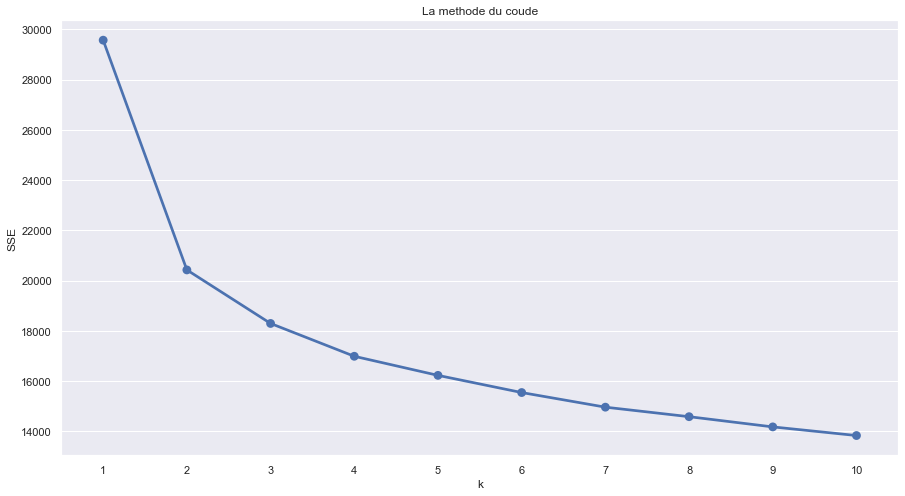

In [45]:
plt.figure(figsize=(15,8))
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_clt)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('La methode du coude')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

En abcisse, nous avons les nombres de clusters et en ordonnée, nous avons l'erreur quadratique. Sur la base de notre observation, la valeur k=4 semble etre le meilleur paramètre pour notre modèle car après cette valeur, la courbe semble avoir une tendance linéaire.

Adaptons le modèle avec la valeur k égale à 4.

In [46]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_clt)
print(model.labels_.shape)

(2216,)


In [51]:
df_clt["Cluster"] = model.labels_

In [52]:
df_clt['Cluster']

0       0
1       1
2       2
3       1
4       2
       ..
2235    0
2236    2
2237    2
2238    2
2239    1
Name: Cluster, Length: 2216, dtype: int32

In [58]:
# 3d Scatter plot of clusters using K-means

import plotly.express as px

fig = px.scatter_3d(df_clt, x= df_clt.iloc[:,0], y= df_clt.iloc[:,1],z = df_clt.iloc[:,2],
                  color=df['Cluster'], labels={'x':'Feature 1', 'y':'Feature 2','z':'Feature 3'} )
fig.show()

In [ ]:
# # #numero de cluster affectés aux groupes
# # res.labels_
# # #effectifs par groupe
# # np.unique(res.labels_,return_counts=True)


# #rajouter la variable au data-frame initial
# B= df_clt[['Income','Age','Recency','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']].copy()
# B['labels'] = res.labels_

# #configuration des points dans le plan
# #des variables prises par paires
# sns.pairplot(B,hue="labels",palette={0:'blue', 1:'green', 2:'red', 3:'orange'})

In [57]:
# sns.pairplot(df_clt[['Education', 'Marital_Status','Cluster']],hue="Cluster",palette={0:'blue', 1:'green', 2:'red'})